In [16]:
import numpy as np
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime
import requests
from dotenv import load_dotenv
import os
import yfinance as yf
import panel as pn
from panel.interact import interact
from panel import widgets
#import plotly.express as px
#pn.extension('plotly')
from scipy import optimize


load_dotenv('../my_keys.env')
from pathlib import Path

# Organize Data Sets for Risk Metric

In [57]:
# Read in Data 
btc_path = Path('BCHAIN-MKPRU.csv')
btc_df = pd.read_csv(btc_path,index_col="Date",infer_datetime_format=True, parse_dates=True)

# Split BTC prices to two periods for risk metric
btc_df = btc_df.iloc[::-1] # reverse df
dates = pd.to_datetime(btc_df.index)
btc_df_period_one = btc_df.iloc[750:2247] # period one data 01-22-2011 to 02-26-2015
btc_df_period_two = btc_df.iloc[1898:4605] # period two data 03-15-2014 - most recent date



In [56]:
btc_both_periods = pd.concat([btc_df_period_one,btc_df_period_two],axis='rows',join='inner', sort=False)
#periods_normalized_df = pd.concat([btc_both_periods,ma_ratio_normalized],axis='columns',join='inner', sort=False)
heatmap_df = periods_normalized_df.iloc[4200:7698]
btc_both_periods

,Value
Date,
2011-01-22,0.4443
2011-01-23,0.4300
2011-01-24,0.4250
2011-01-25,0.4250
2011-01-26,0.4300
...,...
2021-08-01,41659.0600
2021-08-02,40000.4600
2021-08-03,39193.9400


In [65]:
btc_both_periods_heatmap = btc_both_periods.iloc[349:4198]
btc_both_periods_heatmap

,Value
Date,
2012-01-06,6.600
2012-01-07,7.200
2012-01-08,7.200
2012-01-09,7.200
2012-01-10,7.138
...,...
2021-08-01,41659.060
2021-08-02,40000.460
2021-08-03,39193.940


In [47]:
periods_normalized_df.to_csv("heatmap_df.csv")

In [43]:
 ma_ratio_normalized #parameter color on hvplot line, set to ratio

,Ratio
Date,
2012-01-06,0.009140
2012-01-07,0.013088
2012-01-08,0.016947
2012-01-09,0.020856
2012-01-10,0.024636
...,...
2021-08-01,0.206848
2021-08-02,0.206901
2021-08-03,0.205963


In [20]:
# Create 50day MA for period 1
fifty_day_ma = btc_df_period_one.rolling(window=50).mean()
fifty_day_ma.dropna(inplace=True)
fifty_day_ma.rename(columns={'Value':'50 Day'},inplace=True)

In [21]:
# Create 350Day MA for period 1
threehundredfifty_day_ma = btc_df_period_one.rolling(window=350).mean()
threehundredfifty_day_ma.dropna(inplace=True)
threehundredfifty_day_ma.rename(columns={'Value':'350 Day'},inplace=True)

In [22]:
# Concat 50day and 350 day, add Ratio column (50day / 350day)
ma_ratio_period_one = pd.concat([fifty_day_ma,threehundredfifty_day_ma],axis='columns',join='inner', sort=False)
ma_ratio_period_one['Ratio'] = ma_ratio_period_one['50 Day'] / ma_ratio_period_one['350 Day']
ma_ratio_period_one

,50 Day,350 Day,Ratio
Date,,,
2012-01-06,3.606718,6.384125,0.564951
2012-01-07,3.704718,6.403427,0.578552
2012-01-08,3.801318,6.422770,0.591850
2012-01-09,3.899518,6.442127,0.605315
2012-01-10,3.995278,6.461307,0.618339
...,...,...,...
2015-02-22,236.299600,442.637143,0.533845
2015-02-23,235.565600,441.543429,0.533505
2015-02-24,235.074000,440.427029,0.533741


In [23]:
# Normalize data for period 1
ma_ratio_period_one= ma_ratio_period_one.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

<AxesSubplot:xlabel='Date'>

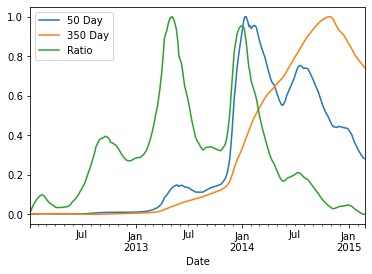

In [24]:
ma_ratio_period_one.plot()

In [26]:
# 50day MA for period 2
fifty_day_ma = btc_df_period_two.rolling(window=50).mean()
fifty_day_ma.dropna(inplace=True)
fifty_day_ma.rename(columns={'Value':'50 Day'},inplace=True)

In [27]:
# 350day ma for period 3
threehundredfifty_day_ma = btc_df_period_two.rolling(window=350).mean()
threehundredfifty_day_ma.dropna(inplace=True)
threehundredfifty_day_ma.rename(columns={'Value':'350 Day'},inplace=True)

In [28]:
# Concat 50day and 350 day, add Ratio column (50day / 350day)
ma_ratio_period_two = pd.concat([fifty_day_ma,threehundredfifty_day_ma],axis='columns',join='inner', sort=False)
ma_ratio_period_two['Ratio'] = ma_ratio_period_two['50 Day'] / ma_ratio_period_two['350 Day']
ma_ratio_period_two

,50 Day,350 Day,Ratio
Date,,,
2015-02-27,232.9806,437.075114,0.533045
2015-02-28,232.4628,435.981314,0.533194
2015-03-01,232.2940,434.950200,0.534070
2015-03-02,232.2906,433.923943,0.535326
2015-03-03,233.1902,432.973829,0.538578
...,...,...,...
2021-08-01,34847.3566,32653.914200,1.067172
2021-08-02,34937.4678,32734.161200,1.067309
2021-08-03,34940.0102,32811.018971,1.064886


<AxesSubplot:xlabel='Date'>

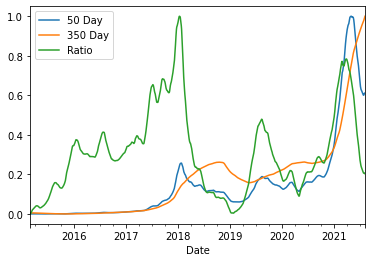

In [29]:
# Normalize period 2 data
ma_ratio_period_two= ma_ratio_period_two.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
ma_ratio_period_two.plot()

In [30]:
# Concat period 1 and period 2
ma_ratio_normalized = pd.concat([ma_ratio_period_one, ma_ratio_period_two],axis='rows',join='inner', sort=False)
ma_ratio_normalized.drop(['50 Day','350 Day'],axis=1, inplace=True)

In [82]:
# Plot Risk Metric
#btc_heatmap = pd.concat([btc_both_periods_value,ma_ratio_normalized],axis='columns',join='inner',sort=False)
btc_heatmap_merge = pd.merge(btc_both_periods_value,ma_ratio_normalized,how="inner",on=None)
btc_heatmap_merge.set_index(btc_heatmap_merge['Date'], append=False, inplace=True)
#btc_heatmap_merge.drop(['Date'],axis=1, inplace=True)
date = pd.to_datetime(btc_heatmap_merge.index)

#plt.semilogy(date,btc_heatmap_merge['Value'])
#plt.semilogy(dates,btc_heatmap_merge['Ratio'])
#plt.show()
#btc_heatmap_merge['Ratio'].plot()
fig,ax = plt.subplots(figsize=(12,8))
ax.semilogy(btc_heatmap_merge.Date,btc_heatmap_merge.Value) #color='red',marker='o')
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Price",color="black",fontsize=14)
ax2=ax.twinx()
ax2.plot(btc_heatmap_merge.Date, btc_heatmap_merge["Ratio"], color="orange") #,marker="o")

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [37]:
# create columns of individual rolling windows. 

,Ratio
Date,
2012-01-06,0.009140
2012-01-07,0.013088
2012-01-08,0.016947
2012-01-09,0.020856
2012-01-10,0.024636
...,...
2021-08-01,0.206848
2021-08-02,0.206901
2021-08-03,0.205963


# Heatmap

In [72]:
# Create a both_periods df and concat with ma_ratio_normalized (all values need to be aligned)
btc_both_periods = pd.concat([btc_df_period_one,btc_df_period_two],axis='rows',join='inner', sort=False)
btc_both_periods_value = btc_both_periods.iloc[349:4198]
btc_heatmap = pd.concat([btc_both_periods_value,ma_ratio_normalized],axis='columns',join='inner',sort=False)
btc_heatmap

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [81]:
duplicate = ma_ratio_normalized[ma_ratio_normalized.duplicated('Ratio')]
duplicate

,Ratio
Date,
2015-02-27,0.0
2018-01-10,1.0


In [79]:
btc_both_periods_value.to_csv("btc_both_periods_value.csv")
ma_ratio_normalized.to_csv("ma_ratio_normalized.csv")

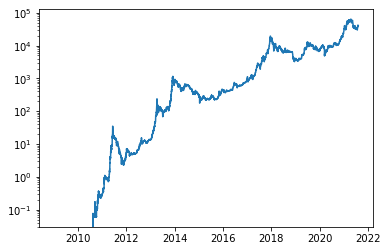

In [32]:
# Create Heatmap for risk metric and plot heatmap over BTC price
plt.semilogy(dates, btc_df['Value'])
#plt.semilogy(dates, ma_ratio_normalized)


In [35]:
btc_df.head()

,Value
Date,
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0
2009-01-06,0.0


In [40]:
master_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)